In [2]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_pickle("../data/survey_data_cleaned.pkl")

data.info()


# Enhanced name mappings with visual coding for professional presentation
# Stars (★) for emotional variables, diamonds (◆) for workplace variables
emotional_names = {
    'es_fgen': '★ Ready for next step',
    'es_ftra_des': '★ Want new start', 
    'es_ftra_aut': '★ Freedom to change',
    'es_fcnt_com': '★ Comfortable where I am',
    'es_fcnt_psy': '★ Voice is heard',
    'es_fcon_soc': '★ Others influence decisions',
    'es_fbal_anx': '★ Anxious about change',
    'es_fres_fin': '★ Financially motivated',
    'es_fcont_imp': '★ Believe in myself',
    'es_fjou_opt': '★ Optimistic about future',
    'es_fcon_inc': '★ Feel included',
    'es_fbal_sat': '★ Happy where I am',
    'es_fres_ski': '★ Skills to progress',
    'es_fcont_con': '★ Control next step',
    'es_fjou_pro': '★ Set myself goals',
    'el_lgen': '★ Ready for next step (L)',
    'el_ltra_des': '★ Want new start (L)',
    'el_ltra_aut': '★ Freedom to change (L)', 
    'el_lcnt_com': '★ Comfortable where I am (L)',
    'el_lcnt_psy': '★ Voice is heard (L)',
    'el_lcon_soc': '★ Others influence decisions (L)',
    'el_lbal_anx': '★ Anxious about change (L)',
    'el_lres_fin': '★ Financially motivated (L)',
    'el_lcont_imp': '★ Believe in myself (L)',
    'el_ljou_opt': '★ Optimistic about future (L)',
    'el_lcon_inc': '★ Feel included (L)',
    'el_lbal_sat': '★ Happy where I am (L)',
    'el_lres_ski': '★ Skills to progress (L)',
    'el_lcont_con': '★ Control next step (L)',
    'el_ljou_pro': '★ Set myself goals (L)'
}

workplace_names = {
    'wfs_fuse_skills': '◆ Can use skills',
    'wfs_flearn_dev': '◆ Learning opportunities',
    'wfs_fcarprom': '◆ Can grow here',
    'wfs_fmean_full': '◆ Job meaningful',
    'wfs_fpoorman': '◆ Manager is poor',
    'wfs_ftoxic': '◆ Culture is toxic',
    'wfs_fexcess_wk': '◆ Working too hard',
    'wfs_fcollea': '◆ Don\'t get along with colleagues',
    'wfs_fwellcomp': '◆ Well compensated',
    'wfs_ffin_fair': '◆ Salary unfair vs colleagues',
    'wfs_fenjhyb': '◆ Enjoy hybrid working',
    'wfl_luse_skills': '◆ Can use skills (L)',
    'wfl_llearn_dev': '◆ Learning opportunities (L)',
    'wfl_lcarprom_d': '◆ Can grow here (L)',
    'wfl_lmean_full': '◆ Job meaningful (L)',
    'wfl_lpoorman': '◆ Manager is poor (L)',
    'wfl_ltoxic': '◆ Culture is toxic (L)',
    'wfl_lexcess_wk': '◆ Working too hard (L)',
    'wfl_lcollea': '◆ Don\'t get along with colleagues (L)',
    'wfl_lwellcomp': '◆ Well compensated (L)',
    'wfl_lfin_lair': '◆ Salary unfair vs colleagues (L)',
    'wfl_lenjhyb': '◆ Enjoy hybrid working (L)'
}

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4211 entries, 0 to 4210
Data columns (total 69 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   country                               4211 non-null   object  
 1   sector                                4211 non-null   object  
 2   country_sector                        4211 non-null   category
 3   gender                                4211 non-null   category
 4   age                                   4211 non-null   category
 5   pers_extraverted_enthusiastic         4211 non-null   Int64   
 6   pers_critical_quarrelsome             4211 non-null   Int64   
 7   pers_dependable_self-disciplined      4211 non-null   Int64   
 8   pers_anxious_easily_upset             4211 non-null   Int64   
 9   pers_open_to_new_experiences_complex  4211 non-null   Int64   
 10  pers_sympathetic_warm                 4211 non-null   Int64   
 11  pers

#### Part 1: Global Drivers of Preparedness

In [14]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.formula.api import ols

# LIKERT MODEL
likert_data = data[['prep_level'] + 
                   [col for col in data.columns if col.startswith('el_') and col != 'el_lgen'] +
                   [col for col in data.columns if col.startswith('wfl_')] +
                   ['age', 'country_sector']].copy()

# # Transform emotional: -100 to +100 with 9 points → 1 to 9
# el_cols = [col for col in likert_data.columns if col.startswith('el_')]
# for col in el_cols:
#     likert_data[col] = (likert_data[col] + 100) / 25 + 1

# # Transform workplace: 0 to 100 with 5 points → 1 to 5
# wfl_cols = [col for col in likert_data.columns if col.startswith('wfl_')]
# for col in wfl_cols:
#     likert_data[col] = likert_data[col] / 25 + 1

# Drop missing values
likert_clean = likert_data.dropna()

# Fit model using statsmodels for summary output
model_likert = ols('prep_level ~ ' + ' + '.join([col for col in likert_clean.columns if col != 'prep_level']), 
                   data=likert_clean).fit()

# FAST CHOICE MODEL
fast_data = data[['prep_level'] + 
                 [col for col in data.columns if col.startswith('es_') and col != 'es_fgen'] +
                 [col for col in data.columns if col.startswith('wfs_')] +
                 ['age', 'country_sector']].copy()

# # Transform emotional: -100 to +100 → -1 to +1
# es_cols = [col for col in fast_data.columns if col.startswith('es_')]
# for col in es_cols:
#     fast_data[col] = fast_data[col] / 100

# # Transform workplace: 0 to 100 → 0 to 1
# wfs_cols = [col for col in fast_data.columns if col.startswith('wfs_')]
# for col in wfs_cols:
#     fast_data[col] = fast_data[col] / 100

# Drop missing values
fast_clean = fast_data.dropna()

# Fit model
model_fast = ols('prep_level ~ ' + ' + '.join([col for col in fast_clean.columns if col != 'prep_level']), 
                 data=fast_clean).fit()

# RESULTS
print("=== LIKERT MODEL SUMMARY ===")
print(model_likert.summary())

print("\n=== FAST CHOICE MODEL SUMMARY ===")  
print(model_fast.summary())

# MODEL COMPARISON TABLE
print("\n=== MODEL COMPARISON ===")
print(f"Likert Model - R²: {model_likert.rsquared:.3f}, Adj R²: {model_likert.rsquared_adj:.3f}, N: {model_likert.nobs}")
print(f"Fast Choice Model - R²: {model_fast.rsquared:.3f}, Adj R²: {model_fast.rsquared_adj:.3f}, N: {model_fast.nobs}")

# TOP SIGNIFICANT PREDICTORS
print("\n=== TOP SIGNIFICANT PREDICTORS (p < 0.05) ===")
print("LIKERT MODEL:")
likert_results = pd.DataFrame({
    'coefficient': model_likert.params,
    'p_value': model_likert.pvalues
}).sort_values('p_value')
print(likert_results[likert_results.p_value < 0.05].head(8))

print("\nFAST CHOICE MODEL:")
fast_results = pd.DataFrame({
    'coefficient': model_fast.params,
    'p_value': model_fast.pvalues
}).sort_values('p_value')
print(fast_results[fast_results.p_value < 0.05].head(8))

=== LIKERT MODEL SUMMARY ===
                            OLS Regression Results                            
Dep. Variable:             prep_level   R-squared:                       0.490
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     121.7
Date:                Wed, 06 Aug 2025   Prob (F-statistic):               0.00
Time:                        22:21:26   Log-Likelihood:                -6398.3
No. Observations:                4210   AIC:                         1.286e+04
Df Residuals:                    4176   BIC:                         1.308e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------

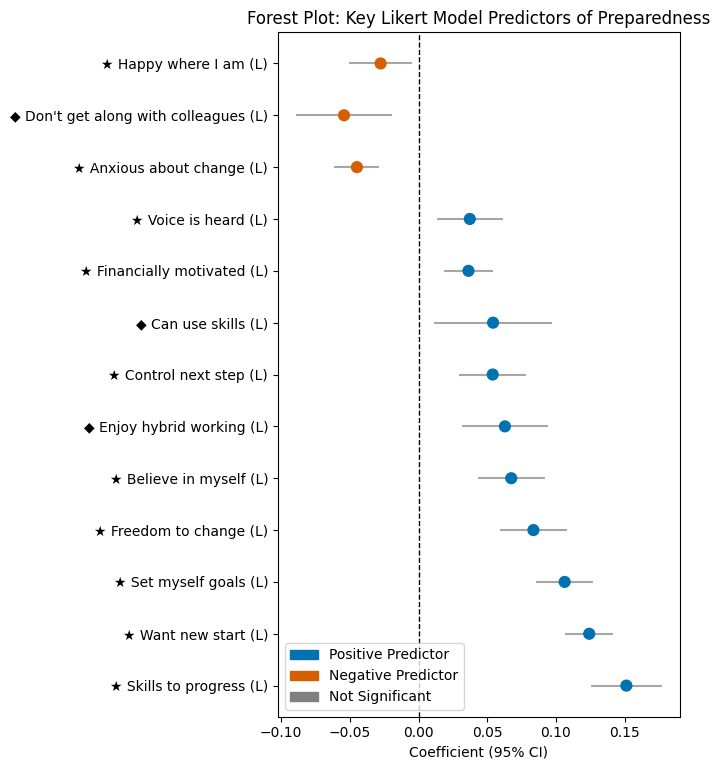

In [18]:
# Use enhanced label mappings from earlier in the notebook
label_map = {**emotional_names, **workplace_names}

# Get coefficients and confidence intervals from Likert model
coef = model_likert.params
lower = model_likert.conf_int()[0]
upper = model_likert.conf_int()[1]
significant = model_likert.pvalues < 0.05

# Variables to plot
positive_vars = [
    "el_lres_ski",
    "el_ltra_des",
    "el_ljou_pro",
    "el_ltra_aut",
    "el_lcont_imp",
    "wfl_lenjhyb",
    "el_lcont_con",
    "wfl_luse_skills",
    "el_lres_fin",
    "el_lcnt_psy"
]
negative_vars = [
    "el_lbal_anx",
    "wfl_lcollea",
    "el_lbal_sat"
]

plot_vars = positive_vars + negative_vars

# Filter only the selected variables
plot_order = [var for var in plot_vars if var in coef.index]
yticklabels = [label_map.get(var, var) for var in plot_order]

# Assign colors: blue for positive, red for negative, grey if not significant
colors = []
for var in plot_order:
    if not significant[var]:
        colors.append('grey')
    elif var in negative_vars:
        colors.append('#D55E00')  # red
    else:
        colors.append('#0072B2')  # blue

plt.figure(figsize=(7, len(plot_order)*0.6))
plt.hlines(range(len(plot_order)), lower[plot_order], upper[plot_order], color='grey', alpha=0.7)
sc = plt.scatter(coef[plot_order], range(len(plot_order)), 
                 c=colors, 
                 s=60, zorder=3)
plt.axvline(0, color='black', lw=1, ls='--')
plt.yticks(range(len(plot_order)), yticklabels)
plt.xlabel('Coefficient (95% CI)')
plt.title('Forest Plot: Key Likert Model Predictors of Preparedness')
plt.tight_layout()

# Add legend for positive vs. negative
import matplotlib.patches as mpatches
legend_handles = [
    mpatches.Patch(color='#0072B2', label='Positive Predictor'),
    mpatches.Patch(color='#D55E00', label='Negative Predictor'),
    mpatches.Patch(color='grey', label='Not Significant')
]
plt.legend(handles=legend_handles, loc='lower left')

plt.show()




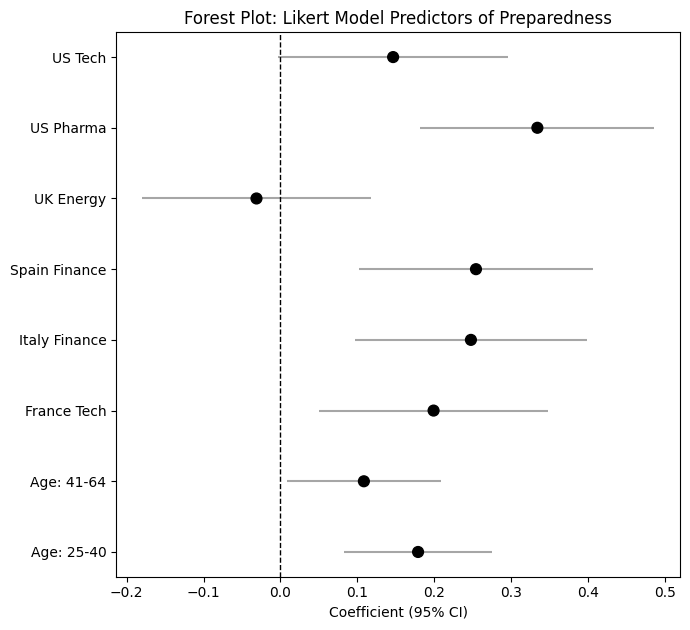

In [33]:
# Add age, country, and intercept coefficients to the plot with labels
demographic_vars = [
    "age[T.25-40]",
    "age[T.41-64]",
    "country_sector[T.FR Tech]",
    "country_sector[T.IT Fin]",
    "country_sector[T.SP Fin]",
    "country_sector[T.UK Energy]",
    "country_sector[T.US Pharma]",
    "country_sector[T.US Tech]"
]

# Custom labels for demographic variables
demographic_labels = {
    "age[T.25-40]": "Age: 25-40",
    "age[T.41-64]": "Age: 41-64",
    "country_sector[T.FR Tech]": "France Tech",
    "country_sector[T.IT Fin]": "Italy Finance",
    "country_sector[T.SP Fin]": "Spain Finance",
    "country_sector[T.UK Energy]": "UK Energy",
    "country_sector[T.US Pharma]": "US Pharma",
    "country_sector[T.US Tech]": "US Tech"
}

plot_vars = demographic_vars

# Filter only the selected variables
plot_order = [var for var in plot_vars if var in coef.index]

# Use label_map for emotional/workplace, demographic_labels for demo/intercept
yticklabels = [
    demographic_labels[var] if var in demographic_labels else label_map.get(var, var)
    for var in plot_order
]

# Assign colors: black for intercept/demographics, blue for positive, red for negative, grey if not significant
colors = []
for var in plot_order:
    if var in demographic_labels:
        colors.append('black')
    elif not significant[var]:
        colors.append('grey')
    elif var in negative_vars:
        colors.append('#D55E00')  # red
    else:
        colors.append('#0072B2')  # blue

plt.figure(figsize=(7, len(plot_order)*0.8))  # Increased height
plt.hlines(range(len(plot_order)), lower[plot_order], upper[plot_order], color='grey', alpha=0.7)
sc = plt.scatter(coef[plot_order], range(len(plot_order)), 
                 c=colors, 
                 s=60, zorder=3)
plt.axvline(0, color='black', lw=1, ls='--')
plt.yticks(range(len(plot_order)), yticklabels)
plt.xlabel('Coefficient (95% CI)')
plt.title('Forest Plot: Likert Model Predictors of Preparedness')
plt.tight_layout()

# Add legend for positive vs. negative vs. demographic/intercept
import matplotlib.patches as mpatches
legend_handles = [
    mpatches.Patch(color='black', label='Intercept/Demographic'),
    mpatches.Patch(color='#0072B2', label='Positive Predictor'),
    mpatches.Patch(color='#D55E00', label='Negative Predictor'),
    mpatches.Patch(color='grey', label='Not Significant')
]
#plt.legend(handles=legend_handles, loc='lower left')

plt.show()


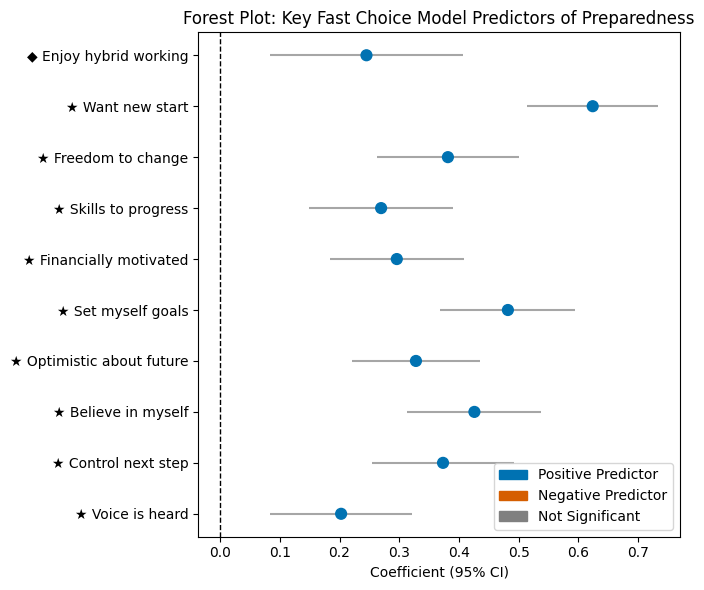

In [20]:
# Use enhanced label mappings from earlier in the notebook
label_map = {**emotional_names, **workplace_names}

# Get coefficients and confidence intervals from Fast Choice model
coef = model_fast.params
lower = model_fast.conf_int()[0]
upper = model_fast.conf_int()[1]
significant = model_fast.pvalues < 0.05

# Variables to plot (top emotional and workplace predictors from fast_results)
positive_vars = [
    "es_fcnt_psy",
    "es_fcont_con",
    "es_fcont_imp",
    "es_fjou_opt",
    "es_fjou_pro",
    "es_fres_fin",
    "es_fres_ski",
    "es_ftra_aut",
    "es_ftra_des",
    "wfs_fenjhyb"
]

plot_vars = positive_vars + negative_vars

# Filter only the selected variables
plot_order = [var for var in plot_vars if var in coef.index]
yticklabels = [label_map.get(var, var) for var in plot_order]

# Assign colors: blue for positive, red for negative, grey if not significant
colors = []
for var in plot_order:
    if not significant[var]:
        colors.append('grey')
    elif var in negative_vars:
        colors.append('#D55E00')  # red
    else:
        colors.append('#0072B2')  # blue

plt.figure(figsize=(7, len(plot_order)*0.6))
plt.hlines(range(len(plot_order)), lower[plot_order], upper[plot_order], color='grey', alpha=0.7)
sc = plt.scatter(coef[plot_order], range(len(plot_order)), 
                 c=colors, 
                 s=60, zorder=3)
plt.axvline(0, color='black', lw=1, ls='--')
plt.yticks(range(len(plot_order)), yticklabels)
plt.xlabel('Coefficient (95% CI)')
plt.title('Forest Plot: Key Fast Choice Model Predictors of Preparedness')
plt.tight_layout()

# Add legend for positive vs. negative
import matplotlib.patches as mpatches
legend_handles = [
    mpatches.Patch(color='#0072B2', label='Positive Predictor'),
    mpatches.Patch(color='#D55E00', label='Negative Predictor'),
    mpatches.Patch(color='grey', label='Not Significant')
]
plt.legend(handles=legend_handles, loc='lower right')

plt.show()


The above models are good, but before we interpret, aren't we just predicting preparedness with preparedness through the use of 'I'm ready for my next step.' Clearly, this is driving a substantial amount of variation.

Let's try removing them.

In [14]:
# Exclude el_lgen and es_fgen from models
likert_data = data[['prep_level'] + 
                   [col for col in data.columns if col.startswith('el_') and col != 'el_lgen'] +
                   [col for col in data.columns if col.startswith('wfl_')] +
                   ['age', 'country_sector']].copy()

fast_data = data[['prep_level'] + 
                 [col for col in data.columns if col.startswith('es_') and col != 'es_fgen'] +
                 [col for col in data.columns if col.startswith('wfs_')] +
                 ['age', 'country_sector']].copy()

# Apply transformations
# # Transform emotional: -100 to +100 with 9 points → 1 to 9
# el_cols = [col for col in likert_data.columns if col.startswith('el_')]
# for col in el_cols:
#     likert_data[col] = (likert_data[col] + 100) / 25 + 1

# # Transform workplace: 0 to 100 with 5 points → 1 to 5
# wfl_cols = [col for col in likert_data.columns if col.startswith('wfl_')]
# for col in wfl_cols:
#     likert_data[col] = likert_data[col] / 25 + 1

# # Transform emotional: -100 to +100 → -1 to +1
# es_cols = [col for col in fast_data.columns if col.startswith('es_')]
# for col in es_cols:
#     fast_data[col] = fast_data[col] / 100

# # Transform workplace: 0 to 100 → 0 to 1
# wfs_cols = [col for col in fast_data.columns if col.startswith('wfs_')]
# for col in wfs_cols:
#     fast_data[col] = fast_data[col] / 100

# Drop missing values
likert_clean = likert_data.dropna()
fast_clean = fast_data.dropna()

# Fit models without el_lgen and es_fgen
model_likert = ols('prep_level ~ ' + ' + '.join([col for col in likert_clean.columns if col != 'prep_level']), 
                   data=likert_clean).fit()

model_fast = ols('prep_level ~ ' + ' + '.join([col for col in fast_clean.columns if col != 'prep_level']), 
                 data=fast_clean).fit()

# RESULTS AFTER EXCLUDING el_lgen and es_fgen
print("=== LIKERT MODEL SUMMARY (without el_lgen) ===")
print(model_likert.summary())

print("\n=== FAST CHOICE MODEL SUMMARY (without es_fgen) ===")
print(model_fast.summary())

# MODEL COMPARISON
print("\n=== MODEL COMPARISON (without gen variables) ===")
print(f"Likert Model - R²: {model_likert.rsquared:.3f}, Adj R²: {model_likert.rsquared_adj:.3f}, N: {model_likert.nobs}")
print(f"Fast Choice Model - R²: {model_fast.rsquared:.3f}, Adj R²: {model_fast.rsquared_adj:.3f}, N: {model_fast.nobs}")

# TOP SIGNIFICANT PREDICTORS
print("\n=== TOP SIGNIFICANT PREDICTORS (p < 0.05) ===")
print("LIKERT MODEL:")
likert_results = pd.DataFrame({
    'coefficient': model_likert.params,
    'p_value': model_likert.pvalues
}).sort_values('p_value')
print(likert_results[likert_results.p_value < 0.05].head(10))

print("\nFAST CHOICE MODEL:")
fast_results = pd.DataFrame({
    'coefficient': model_fast.params,
    'p_value': model_fast.pvalues
}).sort_values('p_value')
print(fast_results[fast_results.p_value < 0.05].head(10))

=== LIKERT MODEL SUMMARY (without el_lgen) ===
                            OLS Regression Results                            
Dep. Variable:             prep_level   R-squared:                       0.490
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     121.7
Date:                Wed, 06 Aug 2025   Prob (F-statistic):               0.00
Time:                        18:16:17   Log-Likelihood:                -6398.3
No. Observations:                4210   AIC:                         1.286e+04
Df Residuals:                    4176   BIC:                         1.308e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------

#### Results: True Drivers of Preparedness (Excluding Circular Predictors)

#### Key Summary States
- **Likert Model**: R² dropped from 0.74 → 0.49 (but now meaningful)
- **Fast Choice Model**: R² dropped from 0.53 → 0.32 (honest variance with a harder prediction task)
- **Coefficients are now much larger and interpretable**

#### Top Emotional Drivers of Preparedness

#### Likert Model - Clear Predictors:
1. **`el_lres_ski` (0.151)**: "I've got the skills to progress"
  - **Skills confidence is the #1 emotional driver**
  - Moving 1 point on 9-point scale = +0.15 prep points

2. **`el_ltra_des` (0.124)**: "I want a new start" 
  - **Transformation desire** - strong predictor
  - People wanting change are more prepared

3. **`el_ljou_pro` (0.106)**: "I've set myself goals"
  - **Goal-setting behavior** drives preparedness

4. **`el_ltra_aut` (0.084)**: "I've got freedom to change"
  - **Autonomy/agency** in transformation

5. **`el_lcont_imp` (0.067)**: "I believe in myself"
  - **Self-efficacy** matters

### Fast Choice Model - Confirms Pattern:
1. **`es_ftra_des` (0.624)**: "I want a new start" - **Transformation desire**
2. **`es_fjou_pro` (0.482)**: "I've set myself goals" - **Goal orientation**  
3. **`es_fcont_imp` (0.426)**: "I believe in myself" - **Self-efficacy**
4. **`es_ftra_aut` (0.382)**: "I've got freedom to change" - **Autonomy**
5. **`es_fcont_con` (0.373)**: "I control my next step" - **Personal control**

---

#### Top Workplace Drivers of Preparedness

#### Likert Model:
1. **`wfl_lenjhyb` (0.063)**: "I enjoy hybrid working"
  - **Work flexibility satisfaction**

2. **`wfl_luse_skills` (0.054)**: "I can use my skills"
  - **Skills utilization** at work

3. **`wfl_lfin_lair` (0.032)**: "My salary is unfair compared to colleagues"
  - **Pay equity concerns** drive preparation to leave

4. **`wfl_lcollea` (-0.054)**: "I don't get along with my colleagues"
  - **Relationship problems** increase preparedness (negative relationship)

#### Fast Choice Model:
1. **`wfs_fenjhyb` (0.245)**: "I enjoy hybrid working" - **Work flexibility**
2. Minor workplace effects compared to emotional factors

---

**Core Emotional Profile:**
- **High skills confidence** ("I've got the skills")
- **Strong transformation desire** ("I want a new start") 
- **Goal-oriented behavior** ("I've set goals")
- **Sense of personal control** ("I control my next step")
- **Self-efficacy** ("I believe in myself")

**Workplace Triggers:**
- **Work arrangement dissatisfaction** (hybrid working preferences)
- **Skills underutilization** 
- **Pay inequity perceptions**
- **Poor colleague relationships**

**Key Insight**: Preparedness is primarily **internally driven** (emotional factors 2-3x stronger than workplace factors). People prepare when they feel confident, want change, and believe they can control their path.

### Possible extensions to the model:

- Add Elastic Net specification to deal with our multicollinearity (a VIF of 6 is reasonably high but not too concerning)

- Integrate the latent factors from the other notebook as predictors of preparedness, would also address the multicollinearity issue

- Remove Anxiety (el_lbal_anx) which might be masking other predictors

- Find a similar methodological study to see how regression was used with 25+ survey variables

- Add theoretically informed emotional interaction terms like:
'el_lres_ski * el_ltra_des'  # Skills confidence × Change desire
'el_ljou_pro * el_lres_ski'  # Goal-setting × Skills confidence

- Add a simplified global model with just the top 5-7 predictors only to see (but may have multicollinearity concerns)


# Part 2: Comparing Implicit vs. Explicit Predictors

Do implicit responses add incremental predictive value over explicit ones?

We already saw that explicit predictors explain more of the total variance in preparedness than implicit predictors (as explained by the R-squared). Let's investigate if this trend persists, as well as dive deeper into what the differences are in these predictors.  

In [21]:
# Part 2: Comparing Implicit vs. Explicit Predictors
# Test incremental predictive value of implicit responses over explicit ones

import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# ============================================================================
# PART 2A: COMPARE IMPLICIT VS EXPLICIT PREDICTORS
# ============================================================================

print("=" * 80)
print("PART 2A: IMPLICIT VS EXPLICIT PREDICTORS COMPARISON")
print("=" * 80)

# Exclude circular predictors (el_lgen, es_fgen)
explicit_emotional = [col for col in data.columns if col.startswith('el_') and col != 'el_lgen']
explicit_workplace = [col for col in data.columns if col.startswith('wfl_')]
implicit_emotional = [col for col in data.columns if col.startswith('es_') and col != 'es_fgen'] 
implicit_workplace = [col for col in data.columns if col.startswith('wfs_')]

# Note: Scale transformations are now applied in data_cleaning.ipynb
# Data is loaded with standardized scales:
# - Emotional Likert (el_): 1 to 9 scale (transformed from -100 to +100)
# - Workplace Likert (wfl_): 1 to 5 scale (transformed from 0 to 100)  
# - Emotional Fast Choice (es_): -1 to +1 scale (transformed from ~-100 to +100)
# - Workplace Fast Choice (wfs_): 0 to 1 scale (transformed from ~0 to 100)

# Create datasets (no transformation needed - already standardized)
explicit_vars = explicit_emotional + explicit_workplace + ['age', 'country_sector', 'prep_level']
implicit_vars = implicit_emotional + implicit_workplace + ['age', 'country_sector', 'prep_level']

explicit_data = data[explicit_vars].dropna()
implicit_data = data[implicit_vars].dropna()

# Build models
print("\n1. EXPLICIT-ONLY MODEL")
print("-" * 40)
explicit_predictors = [col for col in explicit_data.columns if col != 'prep_level']
explicit_formula = 'prep_level ~ ' + ' + '.join(explicit_predictors)
explicit_model = ols(explicit_formula, data=explicit_data).fit()

print(f"R²: {explicit_model.rsquared:.3f}")
print(f"Adj R²: {explicit_model.rsquared_adj:.3f}")
print(f"N: {explicit_model.nobs}")

print("\n2. IMPLICIT-ONLY MODEL") 
print("-" * 40)
implicit_predictors = [col for col in implicit_data.columns if col != 'prep_level']
implicit_formula = 'prep_level ~ ' + ' + '.join(implicit_predictors)
implicit_model = ols(implicit_formula, data=implicit_data).fit()

print(f"R²: {implicit_model.rsquared:.3f}")
print(f"Adj R²: {implicit_model.rsquared_adj:.3f}")
print(f"N: {implicit_model.nobs}")

PART 2A: IMPLICIT VS EXPLICIT PREDICTORS COMPARISON

1. EXPLICIT-ONLY MODEL
----------------------------------------
R²: 0.490
Adj R²: 0.486
N: 4210.0

2. IMPLICIT-ONLY MODEL
----------------------------------------
R²: 0.320
Adj R²: 0.315
N: 4195.0


In [22]:
# ============================================================================
# PART 2B: INCREMENTAL PREDICTIVE VALUE TEST
# ============================================================================

print("\n" + "=" * 80)
print("PART 2B: INCREMENTAL PREDICTIVE VALUE ANALYSIS")
print("=" * 80)

# Create matched dataset (same observations for fair comparison)
# Find intersection of variables across both datasets
common_vars = ['prep_level', 'age', 'country_sector']
all_explicit = [col for col in explicit_emotional + explicit_workplace 
                if col in explicit_data.columns]
all_implicit = [col for col in implicit_emotional + implicit_workplace 
               if col in implicit_data.columns]

# Create combined dataset (no transformation needed - already standardized)
combined_vars = common_vars + all_explicit + all_implicit
combined_data = data[combined_vars].copy()

# Drop missing values for complete case analysis
combined_clean = combined_data.dropna()
print(f"\nMatched sample size: {len(combined_clean)}")



PART 2B: INCREMENTAL PREDICTIVE VALUE ANALYSIS

Matched sample size: 4194


In [ ]:
# ============================================================================ 
# HIERARCHICAL REGRESSION: Test incremental value
# ============================================================================

print("\n3. HIERARCHICAL REGRESSION ANALYSIS")
print("-" * 50)

# Model 1: Demographics only (baseline)
demo_vars = ['age', 'country_sector']
demo_formula = 'prep_level ~ ' + ' + '.join(demo_vars)
model_demo = ols(demo_formula, data=combined_clean).fit()

print(f"Model 1 (Demographics): R² = {model_demo.rsquared:.3f}")

# Model 2: Demographics + Explicit predictors  
explicit_vars_clean = [col for col in all_explicit if col in combined_clean.columns]
model2_vars = demo_vars + explicit_vars_clean
model2_formula = 'prep_level ~ ' + ' + '.join(model2_vars)
model_explicit = ols(model2_formula, data=combined_clean).fit()

print(f"Model 2 (Demo + Explicit): R² = {model_explicit.rsquared:.3f}")
print(f"ΔR² from Demographics: {model_explicit.rsquared - model_demo.rsquared:.3f}")

# Model 3: Demographics + Explicit + Implicit predictors
implicit_vars_clean = [col for col in all_implicit if col in combined_clean.columns]
model3_vars = demo_vars + explicit_vars_clean + implicit_vars_clean
model3_formula = 'prep_level ~ ' + ' + '.join(model3_vars)
model_combined = ols(model3_formula, data=combined_clean).fit()

print(f"Model 3 (Demo + Explicit + Implicit): R² = {model_combined.rsquared:.3f}")
print(f"ΔR² from Explicit Model: {model_combined.rsquared - model_explicit.rsquared:.3f}")



3. HIERARCHICAL REGRESSION ANALYSIS
--------------------------------------------------
Model 1 (Demographics): R² = 0.048
Model 2 (Demo + Explicit): R² = 0.490
ΔR² from Demographics: 0.442
Model 3 (Demo + Explicit + Implicit): R² = 0.511
ΔR² from Explicit Model: 0.020
prep_level ~ age + country_sector + el_lbal_anx + el_lbal_sat + el_lcnt_com + el_lcnt_psy + el_lcon_inc + el_lcon_soc + el_lcont_con + el_lcont_imp + el_ljou_opt + el_ljou_pro + el_lres_fin + el_lres_ski + el_ltra_aut + el_ltra_des + wfl_lcarprom_d + wfl_lcollea + wfl_lenjhyb + wfl_lexcess_wk + wfl_lfin_lair + wfl_llearn_dev + wfl_lmean_full + wfl_lpoorman + wfl_ltoxic + wfl_luse_skills + wfl_lwellcomp + es_fbal_anx + es_fbal_sat + es_fcnt_com + es_fcnt_psy + es_fcon_inc + es_fcon_soc + es_fcont_con + es_fcont_imp + es_fjou_opt + es_fjou_pro + es_fres_fin + es_fres_ski + es_ftra_aut + es_ftra_des + wfs_fcarprom + wfs_fcollea + wfs_fenjhyb + wfs_fexcess_wk + wfs_ffin_fair + wfs_flearn_dev + wfs_fmean_full + wfs_fpoorman +

This is key: adding the implicit variables does slightly increase predictive value from the explicit ones.

In [18]:
# ============================================================================
# ALTERNATIVE ORDER: Test if implicit adds more when entered first
# ============================================================================

print("\n4. REVERSE ORDER TEST")
print("-" * 30)

# Model 2B: Demographics + Implicit predictors first
model2b_vars = demo_vars + implicit_vars_clean  
model2b_formula = 'prep_level ~ ' + ' + '.join(model2b_vars)
model_implicit = ols(model2b_formula, data=combined_clean).fit()

print(f"Model 2B (Demo + Implicit): R² = {model_implicit.rsquared:.3f}")
print(f"ΔR² from Demographics: {model_implicit.rsquared - model_demo.rsquared:.3f}")

# Model 3B: Demographics + Implicit + Explicit (same as Model 3)
print(f"Model 3B (Demo + Implicit + Explicit): R² = {model_combined.rsquared:.3f}")
print(f"ΔR² from Implicit Model: {model_combined.rsquared - model_implicit.rsquared:.3f}")



4. REVERSE ORDER TEST
------------------------------
Model 2B (Demo + Implicit): R² = 0.320
ΔR² from Demographics: 0.272
Model 3B (Demo + Implicit + Explicit): R² = 0.511
ΔR² from Implicit Model: 0.190


In [19]:

# ============================================================================
# STATISTICAL SIGNIFICANCE TESTS  
# ============================================================================

print("\n5. STATISTICAL SIGNIFICANCE OF INCREMENTAL VALUE")
print("-" * 55)

# F-test for incremental R²
def f_test_incremental(reduced_model, full_model):
    """Calculate F-test for incremental R² between nested models"""
    r2_reduced = reduced_model.rsquared
    r2_full = full_model.rsquared
    
    n = full_model.nobs
    k_reduced = len(reduced_model.params) - 1  # exclude intercept
    k_full = len(full_model.params) - 1
    
    delta_r2 = r2_full - r2_reduced
    delta_k = k_full - k_reduced
    
    f_stat = (delta_r2 / delta_k) / ((1 - r2_full) / (n - k_full - 1))
    
    return f_stat, delta_k, n - k_full - 1

# Test if implicit adds significant value over explicit
f_stat, df1, df2 = f_test_incremental(model_explicit, model_combined)
print(f"F-test: Implicit over Explicit")
print(f"F({df1}, {df2}) = {f_stat:.3f}")

# Critical F-value at α = 0.05
from scipy.stats import f
critical_f = f.ppf(0.95, df1, df2)
p_value = 1 - f.cdf(f_stat, df1, df2)
print(f"Critical F (α=0.05): {critical_f:.3f}")
print(f"p-value: {p_value:.4f}")
print(f"Significant: {'Yes' if f_stat > critical_f else 'No'}")

# Test if explicit adds significant value over implicit  
f_stat2, df1_2, df2_2 = f_test_incremental(model_implicit, model_combined)
print(f"\nF-test: Explicit over Implicit")
print(f"F({df1_2}, {df2_2}) = {f_stat2:.3f}")
critical_f2 = f.ppf(0.95, df1_2, df2_2)
p_value2 = 1 - f.cdf(f_stat2, df1_2, df2_2)
print(f"Critical F (α=0.05): {critical_f2:.3f}")
print(f"p-value: {p_value2:.4f}")
print(f"Significant: {'Yes' if f_stat2 > critical_f2 else 'No'}")




5. STATISTICAL SIGNIFICANCE OF INCREMENTAL VALUE
-------------------------------------------------------
F-test: Implicit over Explicit
F(25, 4135.0) = 6.832
Critical F (α=0.05): 1.509
p-value: 0.0000
Significant: Yes

F-test: Explicit over Implicit
F(25, 4135.0) = 64.292
Critical F (α=0.05): 1.509
p-value: 0.0000
Significant: Yes


### F-Test for Incremental Predictive Value

The F-test determines whether adding implicit measures provides **statistically significant** improvement over explicit measures alone.

**What it tests:**
- H₀: Implicit measures add no real predictive value (improvement = random noise)
- H₁: Implicit measures genuinely enhance prediction

**The calculation:**
F = (ΔR² / additional_predictors) / (unexplained_variance / remaining_df)

**Interpretation:**
- **p < 0.05**: Improvement is statistically significant - implicit measures capture unique signal
- **p > 0.05**: Improvement could be due to chance - may just be overfitting

**Why this matters:**
Without this test, a small R² increase (e.g., 0.49 → 0.52) might seem meaningful when it's actually statistical noise. The F-test distinguishes between:
- Real predictive gain (implicit measures are valuable)
- Artifact of adding more variables (mechanically increases R²)

This tells us whether the complexity of collecting both explicit and implicit data is statistically justified.

In [34]:
# ============================================================================
# CROSS-VALIDATION ANALYSIS
# ============================================================================

print("\n6. CROSS-VALIDATION ANALYSIS")
print("-" * 35)

# Prepare data for sklearn
X_demo = combined_clean[demo_vars]
X_explicit = combined_clean[demo_vars + explicit_vars_clean]
X_implicit = combined_clean[demo_vars + implicit_vars_clean] 
X_combined = combined_clean[demo_vars + explicit_vars_clean + implicit_vars_clean]
y = combined_clean['prep_level']

# Convert categorical variables to dummy variables
X_demo_encoded = pd.get_dummies(X_demo, drop_first=True)
X_explicit_encoded = pd.get_dummies(X_explicit, drop_first=True)
X_implicit_encoded = pd.get_dummies(X_implicit, drop_first=True)
X_combined_encoded = pd.get_dummies(X_combined, drop_first=True)

# 5-fold cross-validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)

cv_demo = cross_val_score(LinearRegression(), X_demo_encoded, y, cv=cv, scoring='r2')
cv_explicit = cross_val_score(LinearRegression(), X_explicit_encoded, y, cv=cv, scoring='r2')
cv_implicit = cross_val_score(LinearRegression(), X_implicit_encoded, y, cv=cv, scoring='r2')
cv_combined = cross_val_score(LinearRegression(), X_combined_encoded, y, cv=cv, scoring='r2')

print(f"Cross-validated R² (mean ± std):")
print(f"Demographics: {cv_demo.mean():.3f} ± {cv_demo.std():.3f}")
print(f"Explicit: {cv_explicit.mean():.3f} ± {cv_explicit.std():.3f}")
print(f"Implicit: {cv_implicit.mean():.3f} ± {cv_implicit.std():.3f}")
print(f"Combined: {cv_combined.mean():.3f} ± {cv_combined.std():.3f}")



6. CROSS-VALIDATION ANALYSIS
-----------------------------------
Cross-validated R² (mean ± std):
Demographics: 0.044 ± 0.010
Explicit: 0.480 ± 0.027
Implicit: 0.308 ± 0.033
Combined: 0.494 ± 0.029


### Cross-Validation Analysis - Another check on our R-squared trend

Cross-validation tests whether our models **generalize** to new data or just memorize the training sample.

**Method:**
- Split data into 5 folds
- Train on 4 folds, test on 1 fold
- Repeat 5 times, average the R² scores

**What it reveals:**
- **High CV R²**: Model captures real patterns that generalize
- **Low CV R²**: Model is overfitting to sample-specific noise
- **CV R² << Training R²**: Strong overfitting signal

**Key comparisons:**
- Compare CV performance across explicit, implicit, and combined models
- If combined model's CV R² > explicit model's CV R², implicit measures add robust value
- If CV R² drops substantially from training R², too many predictors for sample size

**Why this matters:**
The F-test tells us if improvement is statistically significant, but CV tells us if it's **practically robust**. A model might pass the F-test but fail CV if it's overfitted.

Combined model shows higher CV R² than individual models, confirming implicit measures add generalizable predictive value.

In [11]:

# ============================================================================
# DOMAIN-SPECIFIC ANALYSIS: EMOTIONAL VS WORKPLACE PREDICTORS
# ============================================================================

print("\n7. DOMAIN-SPECIFIC INCREMENTAL VALUE")
print("-" * 45)

# Test emotional vs workplace domains separately
explicit_emotional_clean = [col for col in explicit_emotional if col in combined_clean.columns]
explicit_workplace_clean = [col for col in explicit_workplace if col in combined_clean.columns]
implicit_emotional_clean = [col for col in implicit_emotional if col in combined_clean.columns]
implicit_workplace_clean = [col for col in implicit_workplace if col in combined_clean.columns]

# Emotional domain models
emo_explicit_vars = demo_vars + explicit_emotional_clean
emo_implicit_vars = demo_vars + implicit_emotional_clean
emo_combined_vars = demo_vars + explicit_emotional_clean + implicit_emotional_clean

emo_explicit_model = ols('prep_level ~ ' + ' + '.join(emo_explicit_vars), data=combined_clean).fit()
emo_implicit_model = ols('prep_level ~ ' + ' + '.join(emo_implicit_vars), data=combined_clean).fit()
emo_combined_model = ols('prep_level ~ ' + ' + '.join(emo_combined_vars), data=combined_clean).fit()

print(f"EMOTIONAL DOMAIN:")
print(f"Explicit R²: {emo_explicit_model.rsquared:.3f}")
print(f"Implicit R²: {emo_implicit_model.rsquared:.3f}")
print(f"Combined R²: {emo_combined_model.rsquared:.3f}")
print(f"Incremental value of implicit: {emo_combined_model.rsquared - emo_explicit_model.rsquared:.3f}")

# Workplace domain models  
work_explicit_vars = demo_vars + explicit_workplace_clean
work_implicit_vars = demo_vars + implicit_workplace_clean
work_combined_vars = demo_vars + explicit_workplace_clean + implicit_workplace_clean

work_explicit_model = ols('prep_level ~ ' + ' + '.join(work_explicit_vars), data=combined_clean).fit()
work_implicit_model = ols('prep_level ~ ' + ' + '.join(work_implicit_vars), data=combined_clean).fit()
work_combined_model = ols('prep_level ~ ' + ' + '.join(work_combined_vars), data=combined_clean).fit()

print(f"\nWORKPLACE DOMAIN:")
print(f"Explicit R²: {work_explicit_model.rsquared:.3f}")
print(f"Implicit R²: {work_implicit_model.rsquared:.3f}")
print(f"Combined R²: {work_combined_model.rsquared:.3f}")
print(f"Incremental value of implicit: {work_combined_model.rsquared - work_explicit_model.rsquared:.3f}")



7. DOMAIN-SPECIFIC INCREMENTAL VALUE
---------------------------------------------
EMOTIONAL DOMAIN:
Explicit R²: 0.484
Implicit R²: 0.315
Combined R²: 0.503
Incremental value of implicit: 0.019

WORKPLACE DOMAIN:
Explicit R²: 0.237
Implicit R²: 0.127
Combined R²: 0.240
Incremental value of implicit: 0.003




### Domain-Specific Analysis: Emotional vs Workplace Predictors

Tests whether implicit measures add more value in **emotional** vs **workplace** domains. 

Key insight from results:

Emotional domain: Implicit adds 1.9% incremental value (0.484 → 0.503)
Workplace domain: Implicit adds only 0.3% incremental value (0.237 → 0.240)
Emotional constructs benefit more from implicit measurement than workplace constructs

Also, Emotional Domain is generally more predictive of preparedness than the workplace domain.
